Двумерное уравнение Бюргерса методом дробных шагов
----
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#Задаем параметры
nx = 61 #количество точек по x
ny = 61 #количество точек по y
dx = 3 / (nx - 1) #шаг по x
dy = 3 / (ny - 1) #шаг по y
dt = 0.001 #шаг по времени
Re = 1 #Число Рейнольдса
eps = 0.0001 #эпсилон для достижения стационара
#большое дельта для входа в цикл
deltau = 1000
deltav = 1000
#создаем массивы u и v
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
#создаем следующие временые массивы бля u и v
un = np.zeros((ny, nx))
vn = np.zeros((ny, nx))
#Зададим начальные условия
v[0, 20:41] = 1
#Создадим массивы для прогоночных коэффициентов u
Au = np.zeros((nx, ny))
Bu = np.zeros((nx, ny))
Cu = np.zeros((nx, ny))
Du = np.zeros((nx, ny))
#Создадим массивы для прогоночных коэффициентов v
Av = np.zeros((nx, ny))
Bv = np.zeros((nx, ny))
Cv = np.zeros((nx, ny))
Dv = np.zeros((nx, ny))
#массивы альфа и бета для u
alphau = np.zeros((nx, ny))
betau = np.zeros((nx, ny))
#массивы альфа и бета для v
alphav = np.zeros((nx, ny))
betav = np.zeros((nx, ny))
#Счетчик временных слоев равен 0
counter = 0

In [3]:
#метод дробных шагов
#for k in range(100):
while (deltau > eps) or (deltav > eps):
    #1-ый шаг для u
    Au[:, :] = - (1.0 / (2.0 * Re * dx * dx)) + (u[:, :] / (2.0 * dx))
    Bu[:, :] = (1.0 / (Re * dx * dx)) - (u[:, :] / (2.0 * dx)) + (1.0 / dt)
    Cu[:, :] = - (1.0 / (2.0 * Re * dx * dx))
    Du[1:-1, 1:-1] = (u[1:-1, 1:-1] / dt) + (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, 0:-2]) / (2.0 * Re * dx * dx) - \
                     u[1:-1, 1:-1] * (u[1:-1, 2:] - u[1:-1, 1:-1]) / (2.0 * dx) + \
                     (u[2:, 1:-1] - 2.0 * u[1:-1, 1:-1] + u[0:-2, 1:-1]) / (Re * dy * dy) - \
                     v[1:-1, 1:-1] * (u[2:, 1:-1] - u[1:-1, 1:-1]) / dy
    #прогонка
    alphau[1, :] = 0.0
    betau[1, :] = u[0, :]
    for j in range(0, nx):
        for i in range(1, ny - 1):
            alphau[i + 1][j] = -Au[i][j] / (Bu[i][j] + Cu[i][j] * alphau[i][j])
            betau[i + 1][j] = (Du[i][j] - Cu[i][j] * betau[i][j]) / (Bu[i][j] + Cu[i][j] * alphau[i][j])
    #верхнее граничное условие
    un[-1, :] = u[-1, :]
    #обратная прогонка
    for j in range(0, nx):
        for i in range(ny - 2, -1, -1):
            un[i][j] = alphau[i + 1][j] * un[i + 1][j] + betau[i + 1][j]
    
    
    
    
    #1-ый шаг для v
    Av[:, :] = - (1.0 / (2.0 * Re * dx * dx)) + (u[:, :] / (2.0 * dx))
    Bv[:, :] = (1.0 / (Re * dx * dx)) - (u[:, :] / (2.0 * dx)) + (1.0 / dt)
    Cv[:, :] = - (1.0 / (2.0 * Re * dx * dx))
    Dv[1:-1, 1:-1] = (v[1:-1, 1:-1] / dt) + (v[1:-1, 2:] - 2 * v[1:-1, 1:-1] + v[1:-1, 0:-2]) / (2.0 * Re * dx * dx) - \
                     u[1:-1, 1:-1] * (v[1:-1, 2:] - v[1:-1, 1:-1]) / (2.0 * dx) + \
                     (v[2:, 1:-1] - 2.0 * v[1:-1, 1:-1] + v[0:-2, 1:-1]) / (Re * dy * dy) - \
                     v[1:-1, 1:-1] * (v[2:, 1:-1] - v[1:-1, 1:-1]) / dy
    #прогонка
    alphav[1, :] = 0.0
    betav[1, :] = v[0, :]
    for j in range(0, nx):
        for i in range(1, ny - 1):
            alphav[i + 1][j] = -Av[i][j] / (Bv[i][j] + Cv[i][j] * alphav[i][j])
            betav[i + 1][j] = (Dv[i][j] - Cv[i][j] * betav[i][j]) / (Bv[i][j] + Cv[i][j] * alphav[i][j])
    #верхнее граничное условие
    vn[-1, :] = v[-1, :]
    #обратная прогонка
    for j in range(0, nx):
        for i in range(ny - 2, -1, -1):
            vn[i][j] = alphav[i + 1][j] * vn[i + 1][j] + betav[i + 1][j]
    
    
    
    
    #2-ой шаг для u
    Au[:, :] = - (1 / (2 * Re * dy * dy)) + (v[:, :] / (2 * dy))
    Bu[:, :] = (1 / (Re * dy * dy)) - (v[:, :] / (2 * dy)) + (1 / dt)
    Cu[:, :] = - (1 / (2 * Re * dy * dy))
    Du[1:-1, 1:-1] = (un[1:-1, 1:-1] / dt) - \
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]) / (2 * Re * dy * dy) + \
                     v[1:-1, 1:-1] * (un[2:, 1:-1] - un[1:-1, 1:-1]) / (2 * dy)
    #прогонка
    alphau[:, 1] = 0.0
    betau[:, 1] = u[:, 0]
    #левый выход
    alphau[40:, 1] = 1.0
    betau[40:, 1] = 0
    #
    for i in range(0, nx):
        for j in range(1, ny - 1):
            alphau[i][j + 1] = -Au[i][j] / (Bu[i][j] + Cu[i][j] * alphau[i][j])
            betau[i][j + 1] = (Du[i][j] - Cu[i][j] * betau[i][j]) / (Bu[i][j] + Cu[i][j] * alphau[i][j])
    #правое граничное условие
    un[:, -1] = u[:, -1]
    #правый выход
    un[20:41, -1] = betau[20:41, -1] / (1 - alphau[20:41, -1])
    #обратная прогонка
    for i in range(0, nx):
        for j in range(ny - 2, -1, -1):
            un[i][j] = alphau[i][j + 1] * un[i][j + 1] + betau[i][j + 1]
    
    
    
    
    #2-ой шаг для v
    Av[:, :] = - (1 / (2 * Re * dy * dy)) + (v[:, :] / (2 * dy))
    Bv[:, :] = (1 / (Re * dy * dy)) - (v[:, :] / (2 * dy)) + (1 / dt)
    Cv[:, :] = - (1 / (2 * Re * dy * dy))
    Dv[1:-1, 1:-1] = (vn[1:-1, 1:-1] / dt) - \
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]) / (2 * Re * dy * dy) + \
                     v[1:-1, 1:-1] * (vn[2:, 1:-1] - vn[1:-1, 1:-1]) / (2 * dy)
    #прогонка
    alphav[:, 1] = 0.0
    betav[:, 1] = v[:, 0]
    for i in range(0, nx):
        for j in range(1, ny - 1):
            alphav[i][j + 1] = -Av[i][j] / (Bv[i][j] + Cv[i][j] * alphav[i][j])
            betav[i][j + 1] = (Dv[i][j] - Cv[i][j] * betav[i][j]) / (Bv[i][j] + Cv[i][j] * alphav[i][j])
    #правое граничное условие
    vn[:, -1] = v[:, -1]
    #обратная прогонка
    for i in range(0, nx):
        for j in range(ny - 2, -1, -1):
            vn[i][j] = alphav[i][j + 1] * vn[i][j + 1] + betav[i][j + 1]
    
    
    
    
    
    #вычисляем дельта для достижения стационара
    deltau = np.max(un - u)
    deltav = np.max(vn - v)
    #Переприсваивание
    u = un.copy()
    v = vn.copy()
    
    v[0, 20:41] = 1
    #увеличиваем счетчик временных слоев
    counter += 1

Время:  0.77


<ipython-input-4-5d53f69d7372>:9: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, u, cmap=cm.viridis)


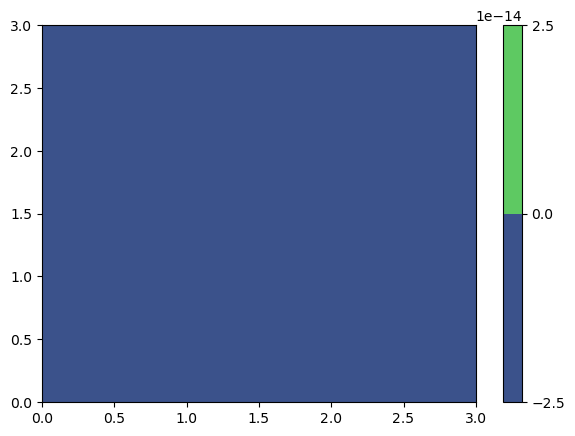

In [4]:
# Построение графика
print("Время: ", counter * dt)
x = np.linspace(0, 3, nx)
y = np.linspace(0, 3, ny)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(7, 5), dpi=100)
plt.contourf(X, Y, u, alpha=1., cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, u, cmap=cm.viridis)
plt.savefig("Burgers2Du.png")
plt.show()

Время:  0.77


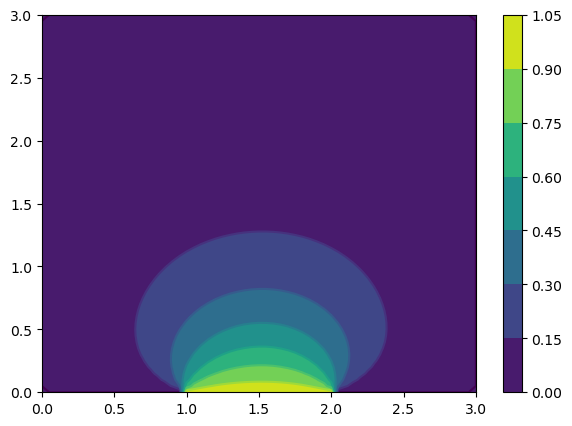

In [5]:
# Построение графика
print("Время: ", counter * dt)
x = np.linspace(0, 3, nx)
y = np.linspace(0, 3, ny)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(7, 5), dpi=100)
plt.contourf(X, Y, v, alpha=1., cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, v, cmap=cm.viridis)
plt.savefig("Burgers2Dv.png")
plt.show()